In [1]:
import tensorflow as tf
import keras
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

c:\users\saisu\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\saisu\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\users\saisu\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Load your trained CNN model
model = keras.models.load_model('../models/1.h5')

In [3]:
# Choose an image to visualize its feature maps
img_path = 'my_image_LB2.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(256, 256))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

In [4]:
# Create a list of layer names to visualize
layer_names = ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2','conv2d_3','max_pooling2d_3','conv2d_4','max_pooling2d_4','dense','dense_1']
#for layer in model.layers:
#    if 'conv' in layer.name:
#        layer_names.append(layer.name)

In [5]:
# Define a new model to output the feature maps for the selected layers
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=[model.get_layer(layer_name).output for layer_name in layer_names])

In [6]:
# Generate the feature maps for the input image
feature_maps = visualization_model.predict(img_array)

1/1 [==============================] - 0s 257ms/step


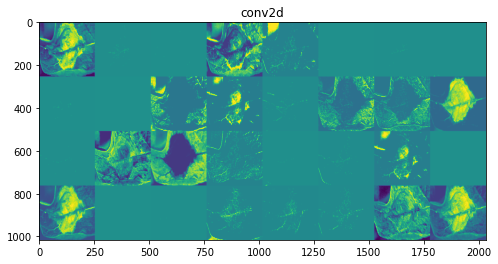

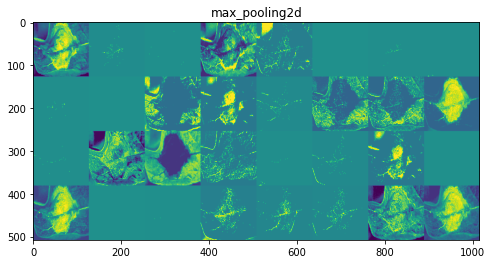

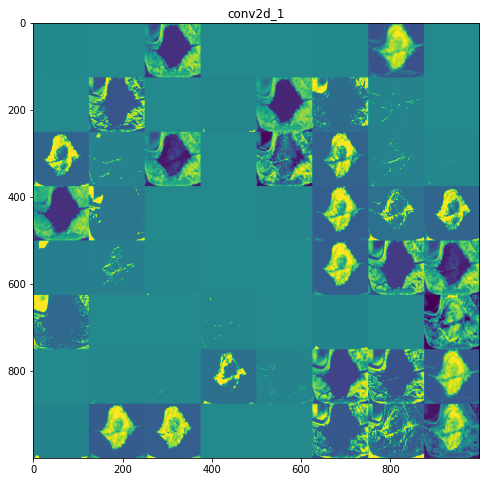

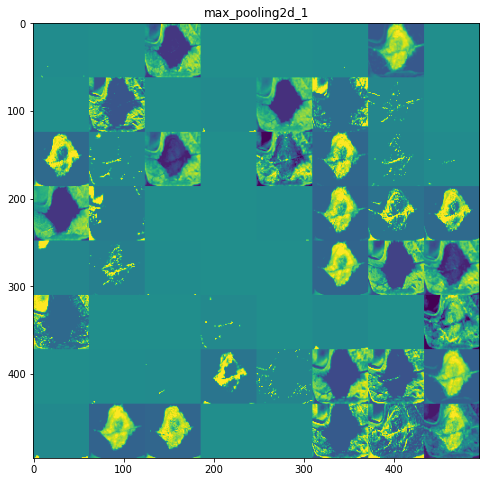

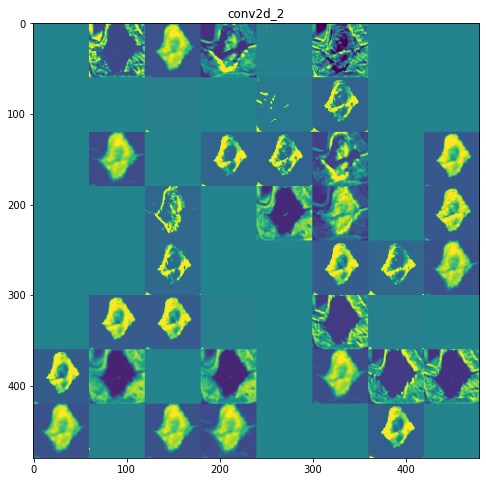

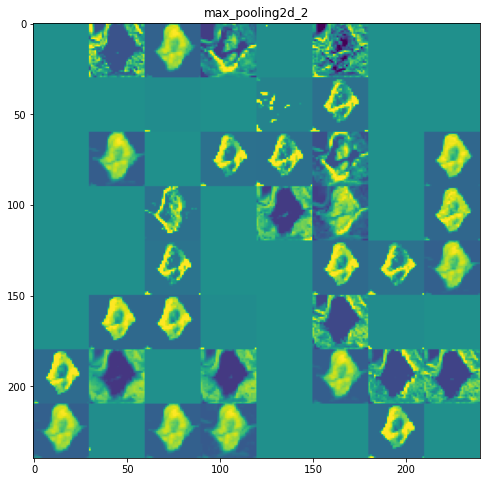

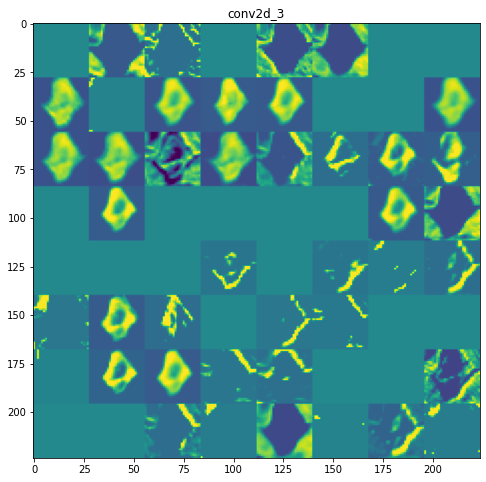

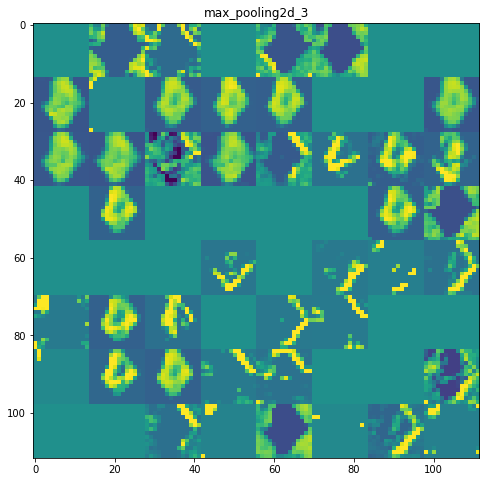

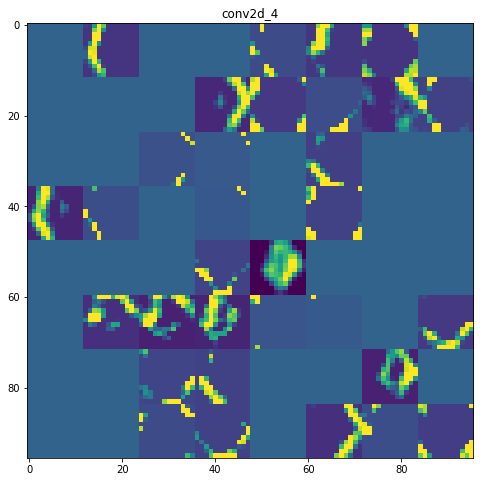

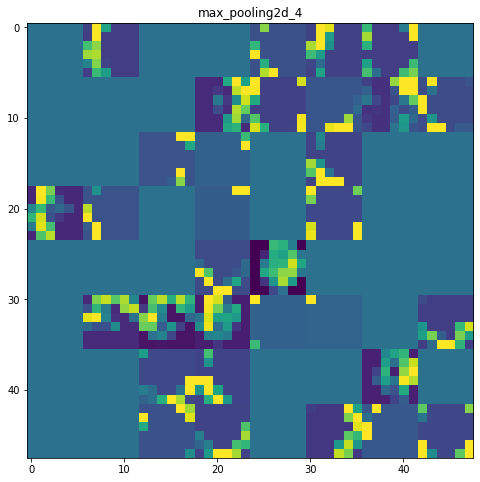

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

In [9]:
# Visualize the feature maps
epsilon = 1e-4
for layer_name, feature_map in zip(layer_names, feature_maps):
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size = feature_map.shape[1]  # size of the feature map
    n_cols = n_features // 8  # number of columns to visualize (max 8)
    
    # Create a grid of features
    display_grid = np.zeros((size*n_cols, 8*size))
    
    for col in range(n_cols):
        for row in range(8):
            if col*8+row < n_features:
                channel_image = feature_map[0, :, :, col*8+row]
                channel_image -= channel_image.mean()  # post-process the feature to make it visually palatable
                channel_image /= (channel_image.std()+epsilon)
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col*size : (col+1)*size, row*size : (row+1)*size] = channel_image
    
    # Display the grid of features
    scale = 1. / size
    plt.figure(figsize=(scale*display_grid.shape[1], scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()